# Exploratory Data Analysis (EDA) of the Candidate Dataset
This notebook performs a detailed exploratory analysis of the candidate dataset (`candidates.csv`), previously loaded into the `raw_candidates` table in PostgreSQL. The goal is to understand the data structure, distributions, and relationships, identifying patterns, inconsistencies, and potential insights. Since the data was randomly generated per the workshop guidelines, interpretations should be made cautiously, as anomalies like duplicate emails may be artifacts of the generation process rather than reflecting real-world behavior, such as re-applications.

## Environment Setup
This section imports the required libraries and establishes a connection to the PostgreSQL database.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()
connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
engine = create_engine(connection_string)

## Data Preparation
This section loads data from the `raw_candidates` table, renames columns for clarity, checks for null values and duplicates, and adjusts data types for efficient analysis.

In [108]:
# Load data from PostgreSQL
query = "SELECT * FROM raw_candidates;"
df = pd.read_sql(query, engine)

# Rename columns for clarity
df.rename(columns={
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'years_of_experience',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}, inplace=True)
df['application_date'] = pd.to_datetime(df['application_date'], format='mixed')
df.head()

,first_name,last_name,email,application_date,country,years_of_experience,seniority,technology,code_challenge_score,technical_interview_score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


In [109]:
# Check for null values
null_counts = df.isnull().sum()
print("Null values by column:\n", null_counts)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate emails
email_duplicates = df['email'].duplicated().sum()
print(f"Number of duplicate emails (excluding the first): {email_duplicates}")

# Review duplicate records
email_duplicates = df.duplicated(subset='email', keep=False).sum()
print("Records sharing the same email:", email_duplicates)
# Optionally display some duplicate email records
if email_duplicates > 0:
    duplicated_emails_df = df[df.duplicated(subset='email', keep=False)].sort_values('email')
    display(duplicated_emails_df.head(10))

# Note on duplicate emails (given the fictional context)
print("""
Note: Duplicate emails might suggest re-applications in a real context, but since the data is randomly generated, \nthese repetitions are likely artifacts of the generation process and may not indicate meaningful behavior.
""")

Null values by column:
 first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
years_of_experience          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64
Number of duplicate rows: 0
Number of duplicate emails (excluding the first): 167
Records sharing the same email: 332


,first_name,last_name,email,application_date,country,years_of_experience,seniority,technology,code_challenge_score,technical_interview_score
15823,Herta,Bartoletti,abbigail94@yahoo.com,2022-02-20,Dominican Republic,21,Mid-Level,Client Success,5,8
31766,Gavin,Brakus,abbigail94@yahoo.com,2019-07-27,Croatia,4,Junior,DevOps,6,2
21805,Jayce,Blick,addison_bode@hotmail.com,2019-08-27,Luxembourg,4,Lead,Development - Backend,7,2
32069,Malika,Krajcik,addison_bode@hotmail.com,2019-02-02,Lithuania,24,Architect,Database Administration,10,3
41691,Lorine,Howe,alberta95@gmail.com,2019-05-28,Afghanistan,21,Junior,Adobe Experience Manager,7,2
2259,Nayeli,Kessler,alberta95@gmail.com,2018-07-22,Germany,25,Architect,Salesforce,9,1
20575,Kamille,Legros,alberto11@yahoo.com,2018-09-13,Taiwan,25,Architect,Business Intelligence,2,9
45066,Clint,Dickens,alberto11@yahoo.com,2018-12-03,Democratic People's Republic of Korea,27,Intern,Sales,0,4
23842,Oswald,Batz,alejandra17@hotmail.com,2018-02-06,Ecuador,19,Intern,Development - Backend,6,10
49819,Kaylin,Hills,alejandra17@hotmail.com,2019-02-24,Iceland,21,Architect,Development - FullStack,2,9



Note: Duplicate emails might suggest re-applications in a real context, but since the data is randomly generated, 
these repetitions are likely artifacts of the generation process and may not indicate meaningful behavior.



## Descriptive Analysis
This section examines basic statistics of numerical and categorical variables, identifying trends, distributions, and potential inconsistencies.

In [110]:
# Descriptive statistics for numerical variables
numeric_stats = df[['years_of_experience', 'code_challenge_score', 'technical_interview_score']].describe()
print("Descriptive statistics for numerical variables:\n", numeric_stats)

# Distribution of key categorical variables
categorical_vars = ['seniority', 'technology', 'country']
for col in categorical_vars:
    print(f"\nDistribution of {col}:\n", df[col].value_counts().head(10))  # Top 10 to avoid overload

Descriptive statistics for numerical variables:
        years_of_experience  code_challenge_score  technical_interview_score
count         50000.000000          50000.000000               50000.000000
mean             15.286980              4.996400                   5.003880
std               8.830652              3.166896                   3.165082
min               0.000000              0.000000                   0.000000
25%               8.000000              2.000000                   2.000000
50%              15.000000              5.000000                   5.000000
75%              23.000000              8.000000                   8.000000
max              30.000000             10.000000                  10.000000

Distribution of seniority:
 seniority
Intern       7255
Mid-Level    7253
Trainee      7183
Junior       7100
Architect    7079
Lead         7071
Senior       7059
Name: count, dtype: int64

Distribution of technology:
 technology
Game Development                   

## Visualizations
This section presents visualizations to explore key distributions and relationships in the dataset, such as seniority, technology, country, and scores.

Text(0, 0.5, 'Count')

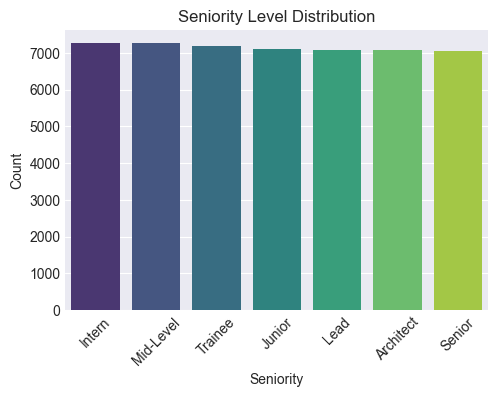

In [111]:
# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

# Set figure size
plt.figure(figsize=(12, 8))

# 1. Seniority Distribution (bar chart)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='seniority', hue='seniority', palette='viridis', legend=False)
plt.title('Seniority Level Distribution')
plt.xticks(rotation=45)
plt.xlabel('Seniority')
plt.ylabel('Count')

Text(0, 0.5, 'Technology')

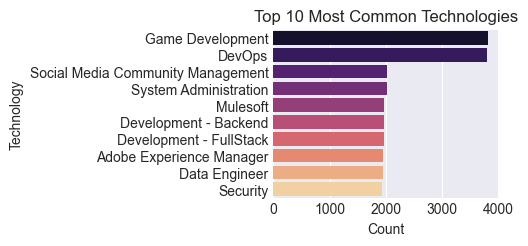

In [112]:
# 2. Technology Distribution (top 10, bar chart)
plt.subplot(2, 2, 2)
tech_counts = df['technology'].value_counts().head(10)
sns.barplot(x=tech_counts.values, y=tech_counts.index, hue=tech_counts.index, palette='magma', legend=False)
plt.title('Top 10 Most Common Technologies')
plt.xlabel('Count')
plt.ylabel('Technology')

Text(0, 0.5, 'Country')

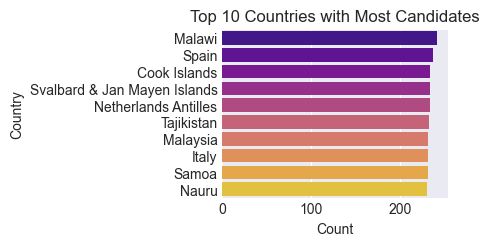

In [113]:
# 3. Country Distribution (top 10, bar chart)
plt.subplot(2, 2, 3)
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, hue=country_counts.index, palette='plasma', legend=False)
plt.title('Top 10 Countries with Most Candidates')
plt.xlabel('Count')
plt.ylabel('Country')

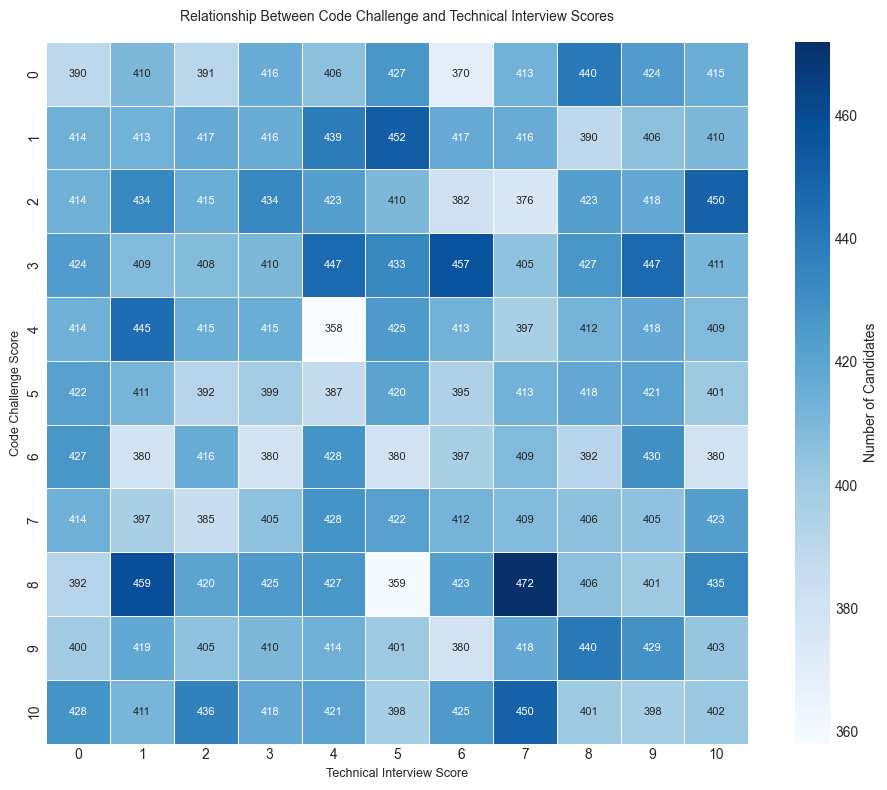

In [114]:
# 4. Score Relationship (heatmap)
pivot_table = df.groupby(['code_challenge_score', 'technical_interview_score']).size().reset_index(name='count')
pivot = pivot_table.pivot(index='code_challenge_score', columns='technical_interview_score', values='count')
plt.figure(figsize=(10, 8))  # Increase the figure size for better readability
sns.heatmap(
    pivot, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Candidates'},
    annot_kws={'size': 8}, square=True, linewidths=0.5, cbar=True
)
plt.title('Relationship Between Code Challenge and Technical Interview Scores', fontsize=10, pad=15)
plt.xlabel('Technical Interview Score', fontsize=9)
plt.ylabel('Code Challenge Score', fontsize=9)
plt.tight_layout()
plt.show()

## Hired Candidate Analysis
This section temporarily explores candidates meeting the criteria for being considered 'hired' (scores of 7 or higher in both code challenge and technical interview). This is an exploratory analysis and does not involve permanent data transformations, which will be handled in the transformation notebook.

In [115]:
# Filter 'hired' candidates (inspired by the image and temp_eda_report.ipynb)
df_hired = df.loc[(df['code_challenge_score'] >= 7) & (df['technical_interview_score'] >= 7)]

# Display a summary of hired candidates
hired_count = len(df_hired)
total_count = len(df)
print(f"Number of hired candidates: {hired_count} ({(hired_count / total_count * 100):.2f}% of total)")

Number of hired candidates: 6698 (13.40% of total)


In [116]:
# Basic descriptive analysis of hired candidates
print("\nDescriptive statistics for hired candidates:")
print(df_hired[['years_of_experience', 'code_challenge_score', 'technical_interview_score']].describe())


Descriptive statistics for hired candidates:
       years_of_experience  code_challenge_score  technical_interview_score
count          6698.000000           6698.000000                6698.000000
mean             15.291281              8.500000                   8.479248
std               8.843949              1.110748                   1.126308
min               0.000000              7.000000                   7.000000
25%               8.000000              8.000000                   7.000000
50%              15.000000              8.000000                   8.000000
75%              23.000000              9.000000                   9.000000
max              30.000000             10.000000                  10.000000


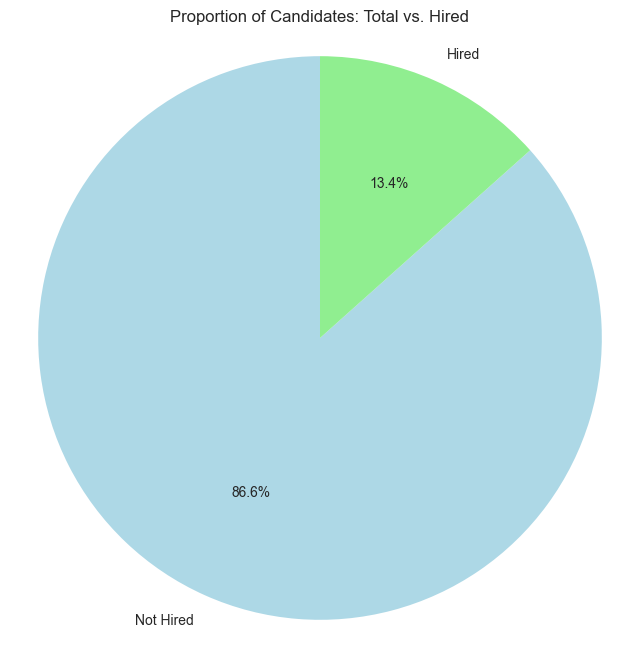

In [117]:
# Pie chart: Proportion of applicants vs. hired
total_applicants = len(df)
total_hired = len(df_hired)
proportions = [total_applicants - total_hired, total_hired]  # Not hired, Hired
labels = ['Not Hired', 'Hired']

plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Proportion of Candidates: Total vs. Hired')
plt.axis('equal')  # Ensure the pie chart is a circle
plt.show()

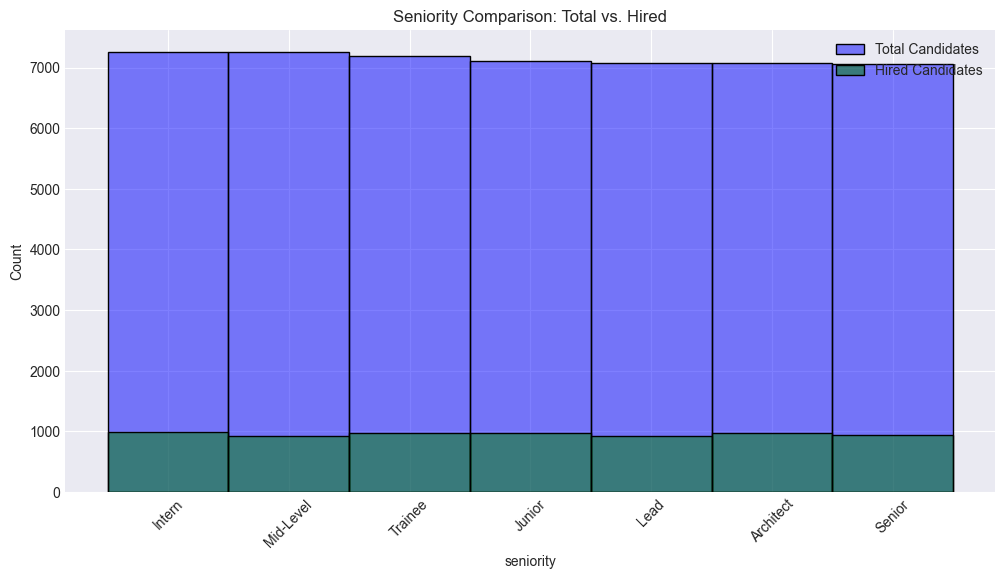

In [118]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='seniority', color='blue', alpha=0.5, label='Total Candidates')
sns.histplot(data=df_hired, x='seniority', color='green', alpha=0.5, label='Hired Candidates')
plt.title('Seniority Comparison: Total vs. Hired')
plt.xticks(rotation=45)
plt.legend()
plt.show()

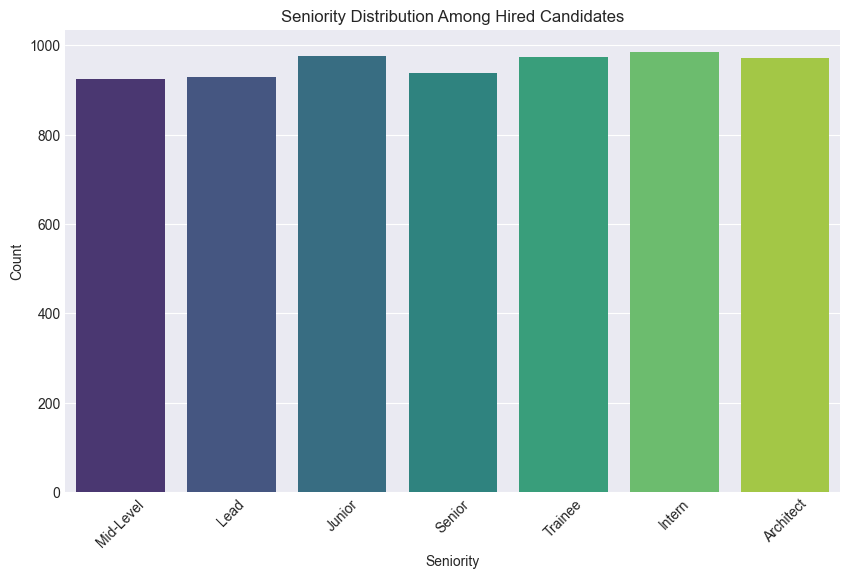

In [119]:
# Seniority distribution among hired candidates
plt.figure(figsize=(10, 6))
sns.countplot(data=df_hired, x='seniority', palette='viridis', hue='seniority', legend=False)
plt.title('Seniority Distribution Among Hired Candidates')
plt.xticks(rotation=45)
plt.xlabel('Seniority')
plt.ylabel('Count')
plt.show()

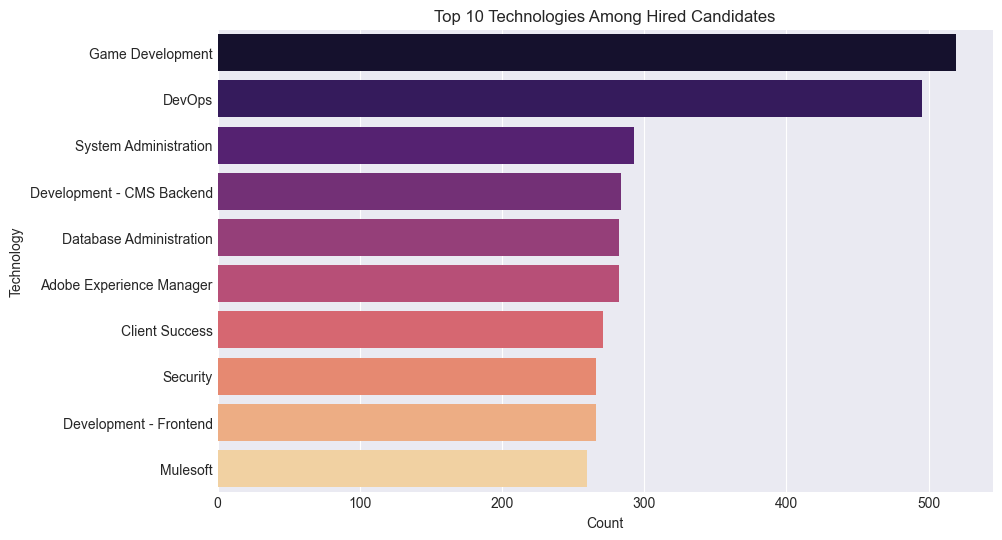

In [120]:
# Technology distribution among hired candidates (top 10)
plt.figure(figsize=(10, 6))
tech_hired_counts = df_hired['technology'].value_counts().head(10)
sns.barplot(x=tech_hired_counts.values, y=tech_hired_counts.index, hue=tech_hired_counts.index, palette='magma')
plt.title('Top 10 Technologies Among Hired Candidates')
plt.xlabel('Count')
plt.ylabel('Technology')
plt.show()

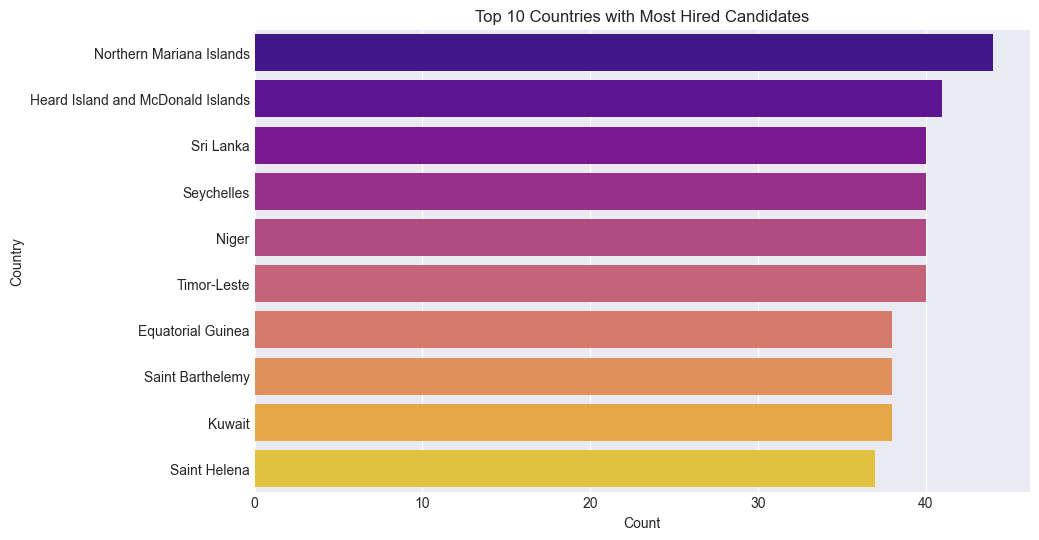

In [121]:
# Country distribution among hired candidates (top 10)
plt.figure(figsize=(10, 6))
country_hired_counts = df_hired['country'].value_counts().head(10)
sns.barplot(x=country_hired_counts.values, y=country_hired_counts.index, hue=country_hired_counts.index, palette='plasma')
plt.title('Top 10 Countries with Most Hired Candidates')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

## Relationship and Inconsistency Analysis
This section investigates relationships between key variables and potential inconsistencies, considering the random nature of the data.

Average Years of Experience by Seniority:
 seniority
Senior       15.174529
Trainee      15.178616
Mid-Level    15.213291
Junior       15.324930
Architect    15.345105
Lead         15.365578
Intern       15.406892
Name: years_of_experience, dtype: float64


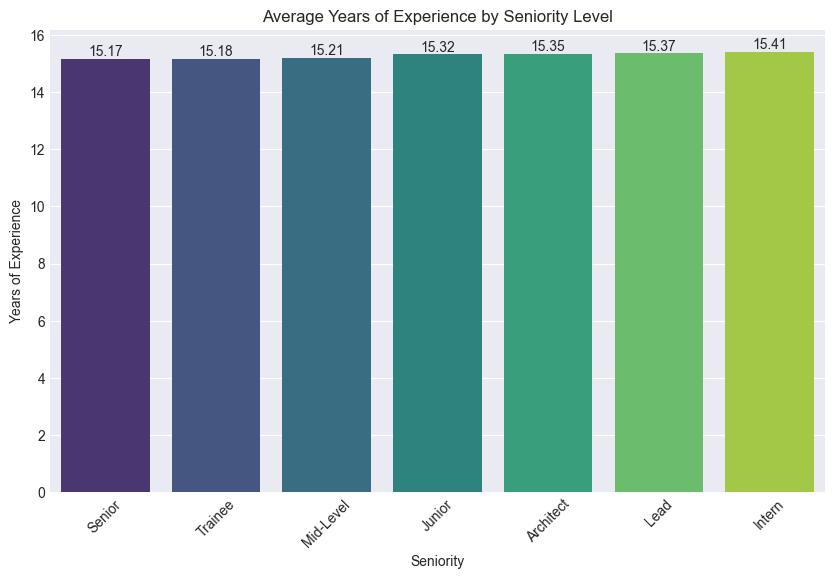

In [122]:
# Relationship between Years of Experience and Seniority
seniority_yoe = df.groupby('seniority')['years_of_experience'].mean().sort_values(ascending=True)
print("Average Years of Experience by Seniority:\n", seniority_yoe)
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=seniority_yoe.index, y=seniority_yoe.values, hue=seniority_yoe.index, palette='viridis', legend=False)
plt.title('Average Years of Experience by Seniority Level')
plt.xticks(rotation=45)
plt.xlabel('Seniority')
plt.ylabel('Years of Experience')

for i, v in enumerate(seniority_yoe.values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

In [123]:
# Analysis of duplicate emails
email_repetitions = df['email'].value_counts()
repeated_emails = email_repetitions[email_repetitions > 1].head(10)
print("\nTop 10 Most Repeated Emails:\n", repeated_emails)

# Note on duplicate emails
print("""
Note: Since the data is randomly generated, duplicate emails are unlikely to indicate real re-applications and are more likely artifacts of the generation process, lacking significant meaning.
""")


Top 10 Most Repeated Emails:
 email
marianne31@yahoo.com            3
fern70@gmail.com                3
isaiah24@yahoo.com              2
missouri65@yahoo.com            2
kelton91@hotmail.com            2
alberta95@gmail.com             2
alberto11@yahoo.com             2
sandra83@gmail.com              2
hildegard_prohaska@yahoo.com    2
julia8@yahoo.com                2
Name: count, dtype: int64

Note: Since the data is randomly generated, duplicate emails are unlikely to indicate real re-applications and are more likely artifacts of the generation process, lacking significant meaning.



## Conclusions
This EDA highlights several characteristics of the candidate dataset:

- **Dataset Structure:** No null values or fully duplicate rows were found, though duplicate emails were identified, likely artifacts of the random generation process rather than meaningful re-applications.
- **Distributions:** Categorical variables (`seniority`, `technology`, `country`) exhibit varied distributions, with some levels or technologies being more frequent. Numerical scores (`code_challenge_score`, `technical_interview_score`) show uniform distributions between 0 and 10, consistent with random data.
- **Hired Candidates:** Approximately 13.41% of candidates meet the hiring criteria (scores ≥ 7 in both categories), with specific distributions in seniority, technologies, and countries, though these should be interpreted cautiously due to the data's randomness.
- **Relationships and Inconsistencies:** An irregular relationship between `years_of_experience` and `seniority` is observed, as expected with fictional data. Technologies and countries could be grouped or filtered for more focused analysis in later steps.
- **Limitations:** Given the random origin, interpretations must be made with care, as anomalies (e.g., duplicate emails) may not reflect real patterns.

These findings will inform transformations and visualizations in the next notebook.